In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, 'housing.cvs')
    return pd.read_csv(csv_path)

In [5]:
housing = pd.read_csv('./datasets/housing/housing.csv')  #Check why it cannot find the relative path
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()  ## Useful for categorical features

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()  ## useful for numerical features

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa383532d50>,
      dtype=object)

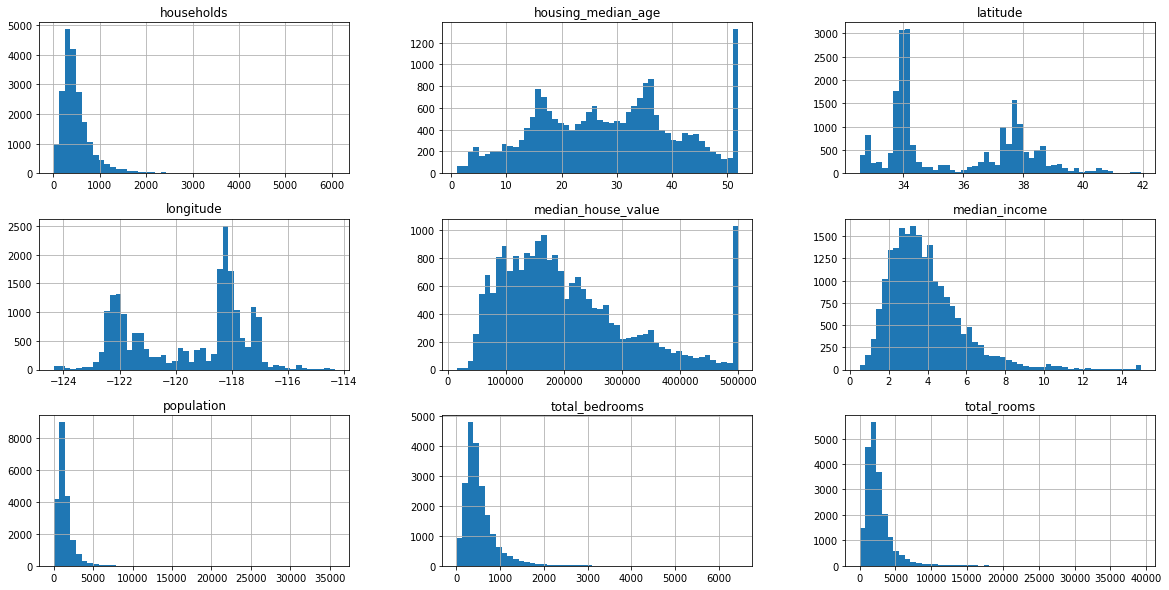

In [9]:
housing.hist(bins=50, figsize=(20, 10))
# plt.show()

### Create test set


In [10]:
train_set, test_set = train_test_split(housing, train_size=0.8, random_state=42)

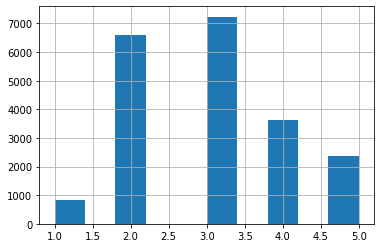

In [11]:
# Avoid  biases in small datasets

housing["income_cat"] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)
housing['income_cat'].hist()

In [12]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]


In [13]:
for set in (strat_train_set, strat_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

In [14]:
housing = strat_train_set.drop(['median_house_value'], axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# EDA

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

In [ ]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population'] / 100, label='Population', c='median_house_value', 
            cmap=plt.get_cmap('jet'), colorbar=True)

### Suggestion
As the higher prices of houses are near the ocean in highly populated areas, we could run a clustering algorithm to create new feature that measure the distance to the cluster centers

### Looking for correlations

In [ ]:
corr_matrix = housing.corr()

In [ ]:
plt.matshow(corr_matrix)
plt.colorbar()

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix

In [ ]:
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

In [ ]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1)

### Combintation of attributes

In [ ]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [ ]:
corr_matrix = housing.corr()

In [ ]:
plt.matshow(corr_matrix)
plt.colorbar()

In [ ]:
corr_matrix['median_house_value'].sort_values(ascending=False)

In [ ]:
corr_matrix

# Prepare data for machine learning algoriothms

## Missing values

In [15]:
from sklearn.impute import SimpleImputer


In [16]:
housing['total_bedrooms'].isnull().sum()
# housing.info()

158

In [17]:
# Treat nans
# 1. Remove samples with nan on an attribute
# housing = housing.dropna(subset=['total_bedrooms'])

# 2. remove attribute from dataframe
# housing = housing.drop(['total_bedrooms'], axis=1)

# 3. Fill Nans with mean, median, mode, etc
# median = housing['total_bedrooms'].median()
# housing['total_bedrooms'].fillna(median)

# Using the SimpleImputer
imputer = SimpleImputer(strategy='median') 
housing_num = housing.drop(['ocean_proximity'], axis=1)
imputer.fit(housing_num)  # Computes the median for each column. It stores it in imputer.statistics_


SimpleImputer(strategy='median')

In [18]:
X = pd.DataFrame(imputer.transform(housing_num), columns=housing_num.columns) # Numpy Array

## Handling text and categorical attributes

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer

encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [ ]:
# Avoid the hierarchy in the categorical variables with OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot.toarray().shape

In [ ]:
# We can run everything in one step
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)  ##
housing_cat_1hot = pd.DataFrame(housing_cat_1hot, 
                                columns= ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
                               index= housing_cat.index)
housing_cat_1hot


## Feature Scaling
There are two common ways to scale the data: min-max scaling (MinMaxScaler, e.g., [0, 1]) and standardization (StandardScaler, mean 0 std 1). StandardScaler is less affected by outliers.

## Custom transformers

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin

# get the right column indices: safer than hard-coding indices 3, 4, 5, 6
rooms_ix, bedrooms_ix, population_ix, household_ix = [
    list(housing.columns).index(col)
    for col in ("total_rooms", "total_bedrooms", "population", "households")]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kwargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# Pipelines
Example on how to create a pipeline

### Combine pipelines

In [24]:
from sklearn.pipeline import Pipeline, FeatureUnion 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

num_attribs = housing_num.columns
cat_attribs = ["ocean_proximity"]
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder())
])

pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

housing_tr = pipeline.fit_transform(housing)

In [32]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest_clf = RandomForestRegressor(n_estimators=1, n_jobs=-1, max_depth=5)
forest_clf.fit(housing_tr, housing_labels)

RandomForestRegressor(max_depth=5, n_estimators=1, n_jobs=-1)

In [33]:
forest_scores = cross_val_score(forest_clf, housing_tr, housing_labels, cv=3, scoring='neg_mean_squared_error')
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [69372.24616486 72632.53121589 71773.21857828]
Mean: 71259.33198634547
Standard deviation: 1379.7159672719865
